## **Задача для исследование**: Необходимо построить модель, которая выясняет есть ли риск дефолта у человека

Загружаем необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score,precision_score, recall_score, classification_report, confusion_matrix

from sklearn.metrics import roc_auc_score, roc_curve

**Данные по таблице:**

* ID: unique ID of representative
* Loan Amount: loan amount applied
* Funded Amount:loan amount funded
* Funded Amount Investor: loan amount approved by the investors
* Term: term of loan (in months)
* Batch Enrolled: batch numbers to representatives
* Interest Rate: interest rate (%) on loan
* Grade: grade by the bank
* Sub Grade: sub-grade by the bank
* Debit to Income: ratio of representative's total monthly debt repayment divided by self reported monthly income excluding mortgage
* Delinquency - two years: number of 30+ days delinquency in past 2 - years
Inquires - six months: total number of inquiries in last 6 months
* Open Account: number of open credit line in representative's - credit line
* Public Record: number of derogatory public records
* Revolving Balance: total credit revolving balance
* Revolving Utilities: amount of credit a representative is using - relative to revolving_balance
* Total Accounts: total number of credit lines available in - representatives credit line
* Initial List Status: unique listing status of the loan - - W(Waiting), F(Forwarded)
* Total Received Interest: total interest received till date
* Total Received Late Fee: total late fee received till date
* Recoveries: post charge off gross recovery
* Collection Recovery Fee: post charge off collection fee
* Collection 12 months Medical: total collections in last 12 months - excluding medical collections
* Application Type: indicates when the representative is an individual or joint
* Last week Pay: indicates how long (in weeks) a representative has paid EMI after batch enrolled
* Accounts Delinquent: number of accounts on which the representative is delinquent
* Total Collection Amount: total collection amount ever owed
* Total Current Balance: total current balance from all accounts
* Total Revolving Credit Limit: total revolving credit limit
* Loan Status: 1 = Defaulter, 0 = Non Defaulters

In [2]:
df= pd.read_csv("train.csv")
df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


## **EDA данных**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

Все данные заполнены

In [4]:
for name in df.columns:
  print(f"Unique for {name}")
  print(df[name].unique())
  print()

Unique for ID
[65087372  1450153  1969101 ... 16435904  5300325 65443173]

Unique for Loan Amount
[10000  3609 28276 ... 30703 17417  8323]

Unique for Funded Amount
[32236 11940  9311 ... 17672 32921 29875]

Unique for Funded Amount Investor
[12329.36286 12191.99692 21603.22455 ... 12329.45775 21353.68465
 14207.4486 ]

Unique for Term
[59 36 58]

Unique for Batch Enrolled
['BAT2522922' 'BAT1586599' 'BAT2136391' 'BAT2428731' 'BAT5341619'
 'BAT4694572' 'BAT4808022' 'BAT2558388' 'BAT2078974' 'BAT2252229'
 'BAT2333412' 'BAT5849876' 'BAT2833642' 'BAT2803411' 'BAT5525466'
 'BAT5714674' 'BAT2003848' 'BAT4722912' 'BAT3873588' 'BAT1780517'
 'BAT4271519' 'BAT5811547' 'BAT1184694' 'BAT4136152' 'BAT3193689'
 'BAT1467036' 'BAT2575549' 'BAT4351734' 'BAT1104812' 'BAT5924421'
 'BAT1930365' 'BAT1766061' 'BAT5489674' 'BAT3865626' 'BAT5629144'
 'BAT5547201' 'BAT224923' 'BAT3726927' 'BAT3461431' 'BAT1761981'
 'BAT1135695']

Unique for Interest Rate
[11.13500686 12.23756263 12.54588365 ... 19.65094342 13

Удалим столбцы, которые не информативны

In [5]:
df.drop(['ID','Batch Enrolled','Sub Grade','Payment Plan','Loan Title','Application Type','Accounts Delinquent'],axis=1,inplace=True)

In [6]:
for name in df.columns:
  print(f"Unique for {name}")
  print(df[name].unique())
  print()

Unique for Loan Amount
[10000  3609 28276 ... 30703 17417  8323]

Unique for Funded Amount
[32236 11940  9311 ... 17672 32921 29875]

Unique for Funded Amount Investor
[12329.36286 12191.99692 21603.22455 ... 12329.45775 21353.68465
 14207.4486 ]

Unique for Term
[59 36 58]

Unique for Interest Rate
[11.13500686 12.23756263 12.54588365 ... 19.65094342 13.16909487
 16.03463076]

Unique for Grade
['B' 'C' 'F' 'A' 'G' 'E' 'D']

Unique for Employment Duration
['MORTGAGE' 'RENT' 'OWN']

Unique for Home Ownership
[176346.6267   39833.921    91506.69105 ...  34813.96985  96938.83564
 105123.1558 ]

Unique for Verification Status
['Not Verified' 'Source Verified' 'Verified']

Unique for Debit to Income
[16.28475781 15.41240945 28.13761862 ... 10.29577356  7.61462376
 16.05211225]

Unique for Delinquency - two years
[1 0 3 6 2 7 5 4 8]

Unique for Inquires - six months
[0 3 2 1 4 5]

Unique for Open Account
[13 12 14  7 16 11  6 17 10  8  9 26 31 28 19 15 33 30 21 18 27 20 25 24
 23 22 34 32 29

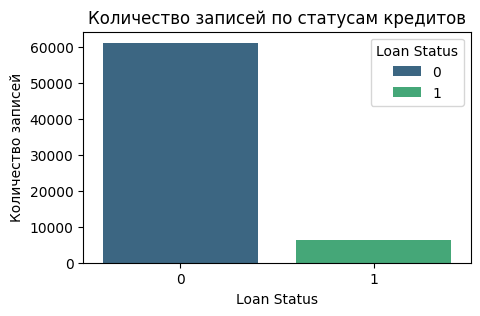

In [7]:
# Группировка данных по 'Loan Status' и подсчет количества записей для каждого статуса
loan_status_counts = df.groupby('Loan Status').size().reset_index(name='Count')

# Визуализация данных
plt.figure(figsize=(5, 3))
sns.barplot(x='Loan Status', y='Count', data=loan_status_counts, palette='viridis', hue = 'Loan Status')
plt.title('Количество записей по статусам кредитов')
plt.xlabel('Loan Status')
plt.ylabel('Количество записей')
plt.show()

Небольшое количество дефолтных записей


In [8]:
# Анализ числовых столбцов
print("Анализ числовых столбцов:")
numeric_columns = df.select_dtypes(include='number').columns
for name in numeric_columns:
    print(f'\nСреднее значение для {name}:')
    print(df.groupby('Loan Status')[name].mean())

# Анализ категориальных столбцов
print("\nАнализ категориальных столбцов:")
categorical_columns = df.select_dtypes(include='object').columns.difference(['Loan Status'])
for name in categorical_columns:
    print(f'\nРаспределение для {name}:')
    print(df.groupby('Loan Status')[name].value_counts(normalize=True).unstack())


Анализ числовых столбцов:

Среднее значение для Loan Amount:
Loan Status
0    16860.853092
1    16731.674411
Name: Loan Amount, dtype: float64

Среднее значение для Funded Amount:
Loan Status
0    15767.04910
1    15805.42349
Name: Funded Amount, dtype: float64

Среднее значение для Funded Amount Investor:
Loan Status
0    14621.996411
1    14619.865956
Name: Funded Amount Investor, dtype: float64

Среднее значение для Term:
Loan Status
0    58.177436
1    58.138279
Name: Term, dtype: float64

Среднее значение для Interest Rate:
Loan Status
0    11.842815
1    11.880032
Name: Interest Rate, dtype: float64

Среднее значение для Home Ownership:
Loan Status
0    80488.081484
1    81065.543995
Name: Home Ownership, dtype: float64

Среднее значение для Debit to Income:
Loan Status
0    23.307491
1    23.218310
Name: Debit to Income, dtype: float64

Среднее значение для Delinquency - two years:
Loan Status
0    0.324573
1    0.352187
Name: Delinquency - two years, dtype: float64

Среднее зна

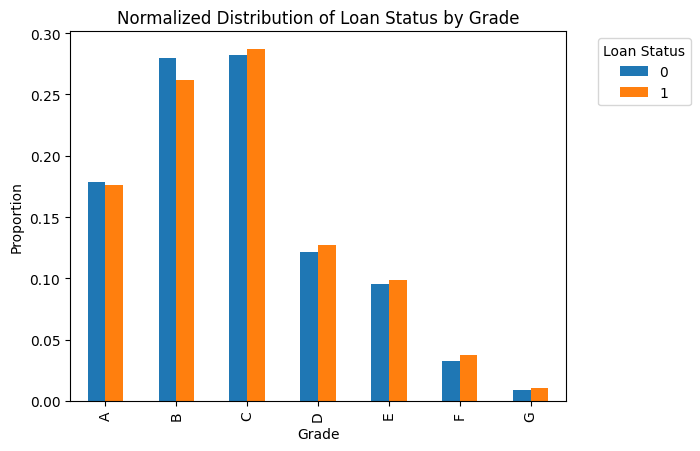

In [9]:
# Группировка и вычисление нормализованных значений
grouped_data = df.groupby('Loan Status')['Grade'].value_counts(normalize=True).unstack().T

# Создание графика
ax = grouped_data.plot(kind='bar')

# Настройка графика
plt.title('Normalized Distribution of Loan Status by Grade')
plt.xlabel('Grade')
plt.ylabel('Proportion')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Показ графика
plt.show()

Больше дефолтных людей было, где "Grade" был меньше уровня B


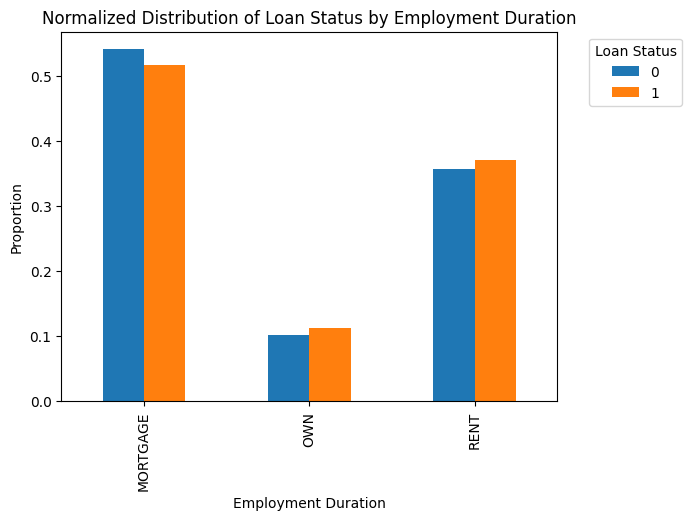

In [10]:
# Группировка и вычисление нормализованных значений
grouped_data = df.groupby('Loan Status')['Employment Duration'].value_counts(normalize=True).unstack().T

# Создание графика
ax = grouped_data.plot(kind='bar')

# Настройка графика
plt.title('Normalized Distribution of Loan Status by Employment Duration')
plt.xlabel('Employment Duration')
plt.ylabel('Proportion')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Показ графика
plt.show()

Также меньше человек с дефолтом, у кого ипотека. Это говорит о том, что банк ранее анализировал финансовое состояние челочек, прежде чем выдавать ипотеку

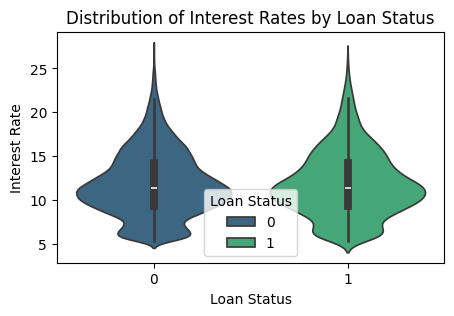

In [11]:
# Создание violin plot для отображения процентных ставок по статусу кредита
plt.figure(figsize=(5, 3))
sns.violinplot(x='Loan Status', y='Interest Rate', data=df, palette='viridis', hue = 'Loan Status')

# Настройка графика
plt.title('Distribution of Interest Rates by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')

# Показ графика
plt.show()

Примерное одинаковое, но можно судить, что у дефолтных людей чаще встречалась низкая ставка, чем у обычных людей

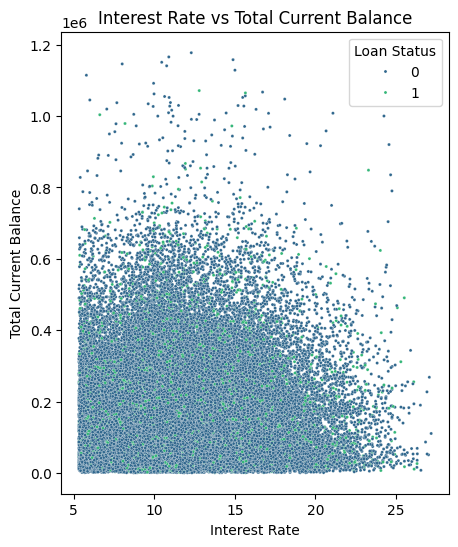

In [12]:
# Создание scatter plot для отображения зависимости между процентной ставкой и текущим балансом
plt.figure(figsize=(5, 6))
sns.scatterplot(x='Interest Rate', y='Total Current Balance', data=df, palette='viridis', s=5, hue = 'Loan Status')

# Настройка графика
plt.title('Interest Rate vs Total Current Balance')
plt.xlabel('Interest Rate')
plt.ylabel('Total Current Balance')

# Показ графика
plt.show()

Нет зависимости от ставки и имеющих денег

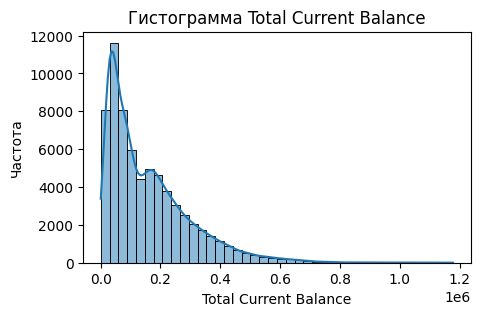

In [13]:
# Постройте гистограмму
plt.figure(figsize=(5, 3))
sns.histplot(df['Total Current Balance'], bins=40, kde=True)

# Настройка графика
plt.title('Гистограмма Total Current Balance')
plt.xlabel('Total Current Balance')
plt.ylabel('Частота')

# Покажите график
plt.show()

Распределение в доходах идет равномерное, нет сильного разрыва между богатыми и бедными

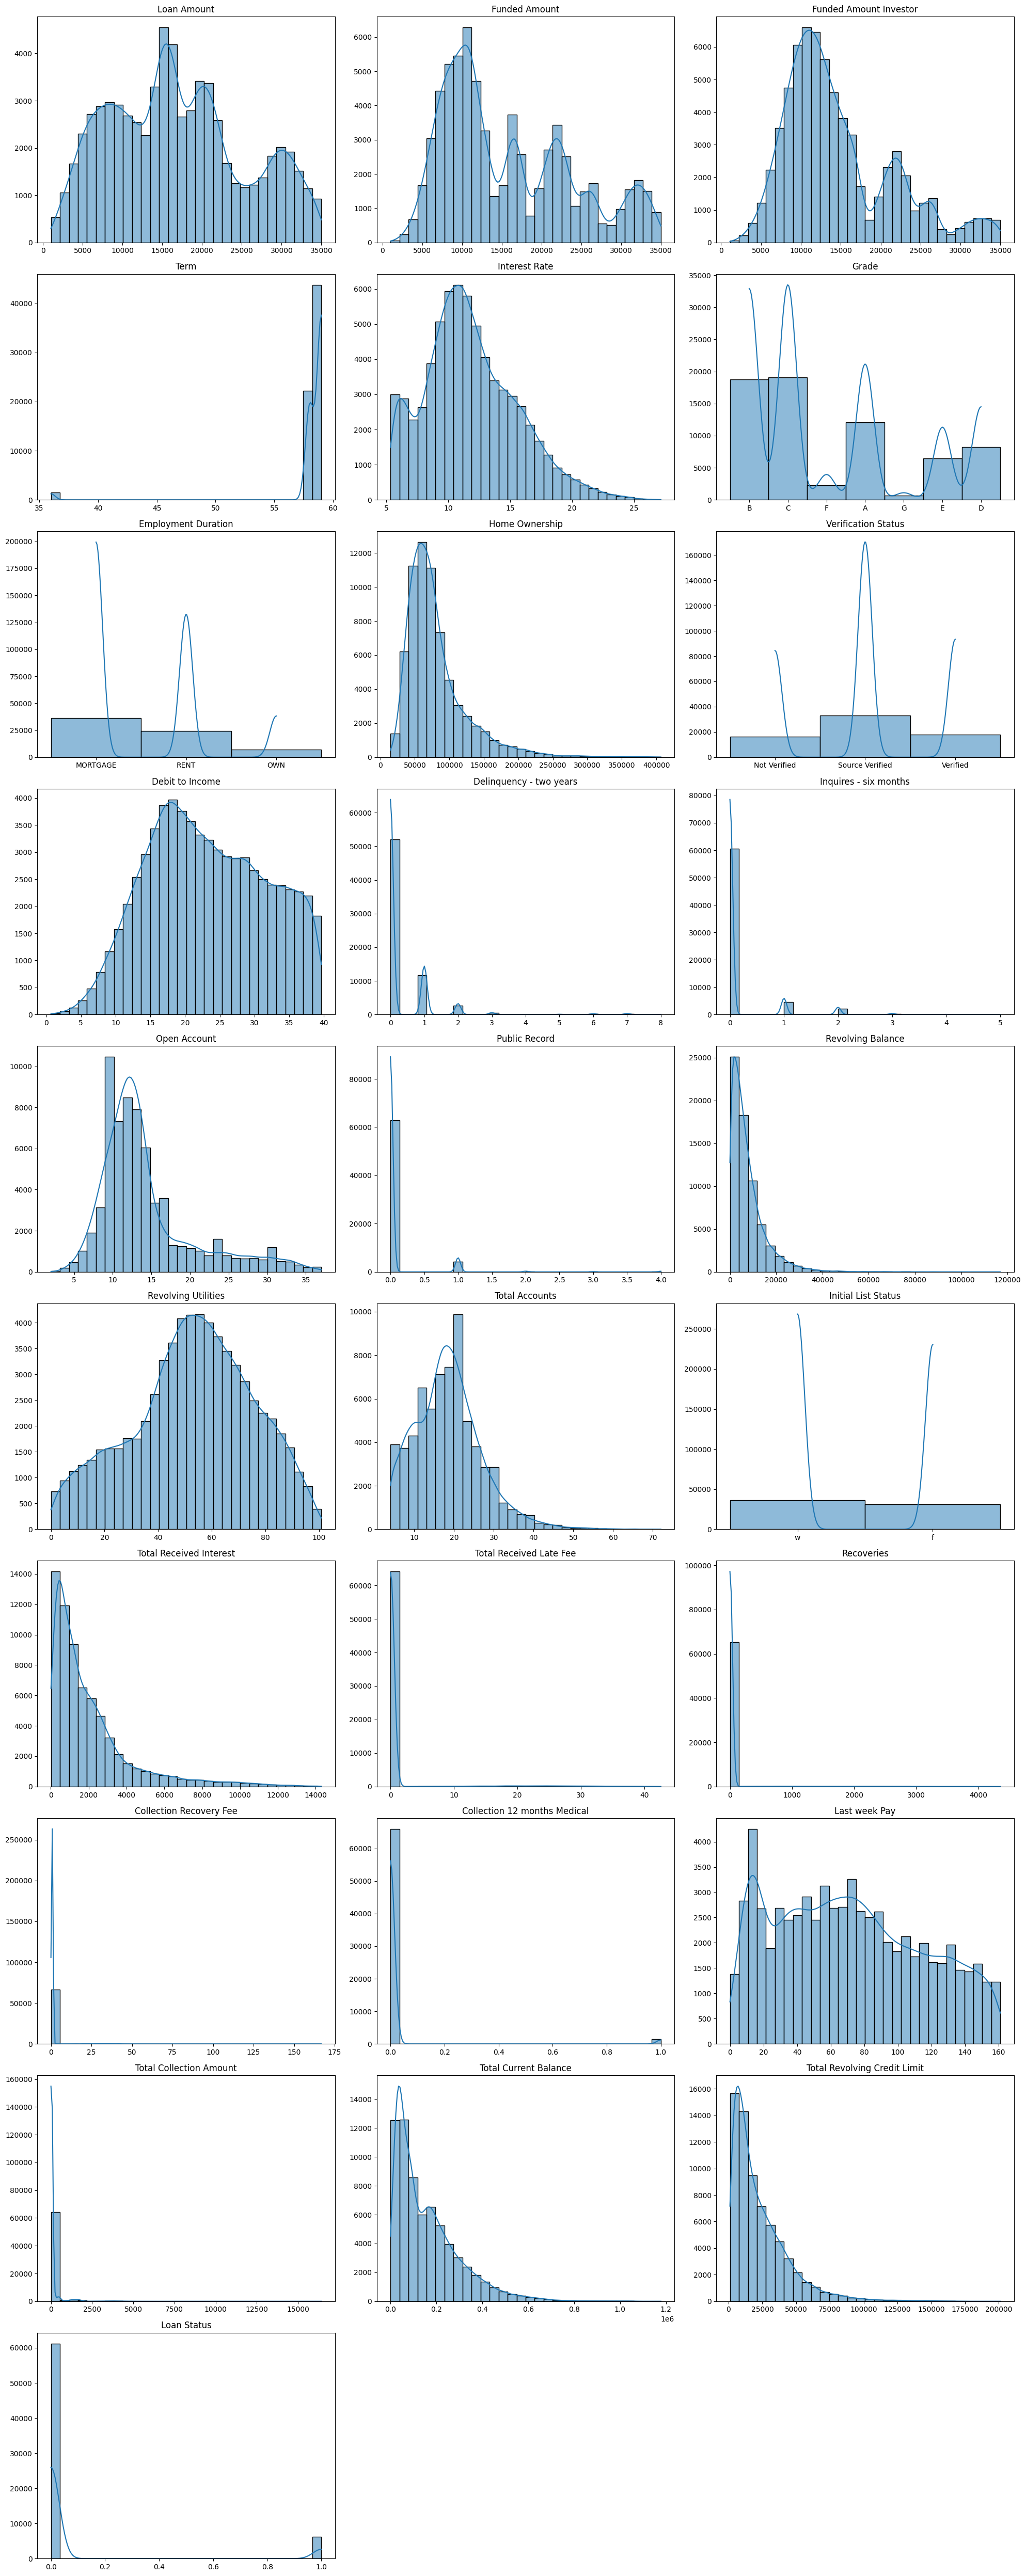

In [14]:
# Определите размер полотна и количество подграфиков
num_columns = len(df.columns)
num_rows = (num_columns + 2) // 3  # 3 графика в ряду

plt.figure(figsize=(20, num_rows * 5))

# Построение гистограмм для каждого столбца
for i, column in enumerate(df.columns):
    plt.subplot(num_rows, 3, i + 1)
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

На графиках выше видно, что сумма кредита и финансирования имеет мультимодальное распределение. Посмотрим зависит ли распределение от "Loan Status"

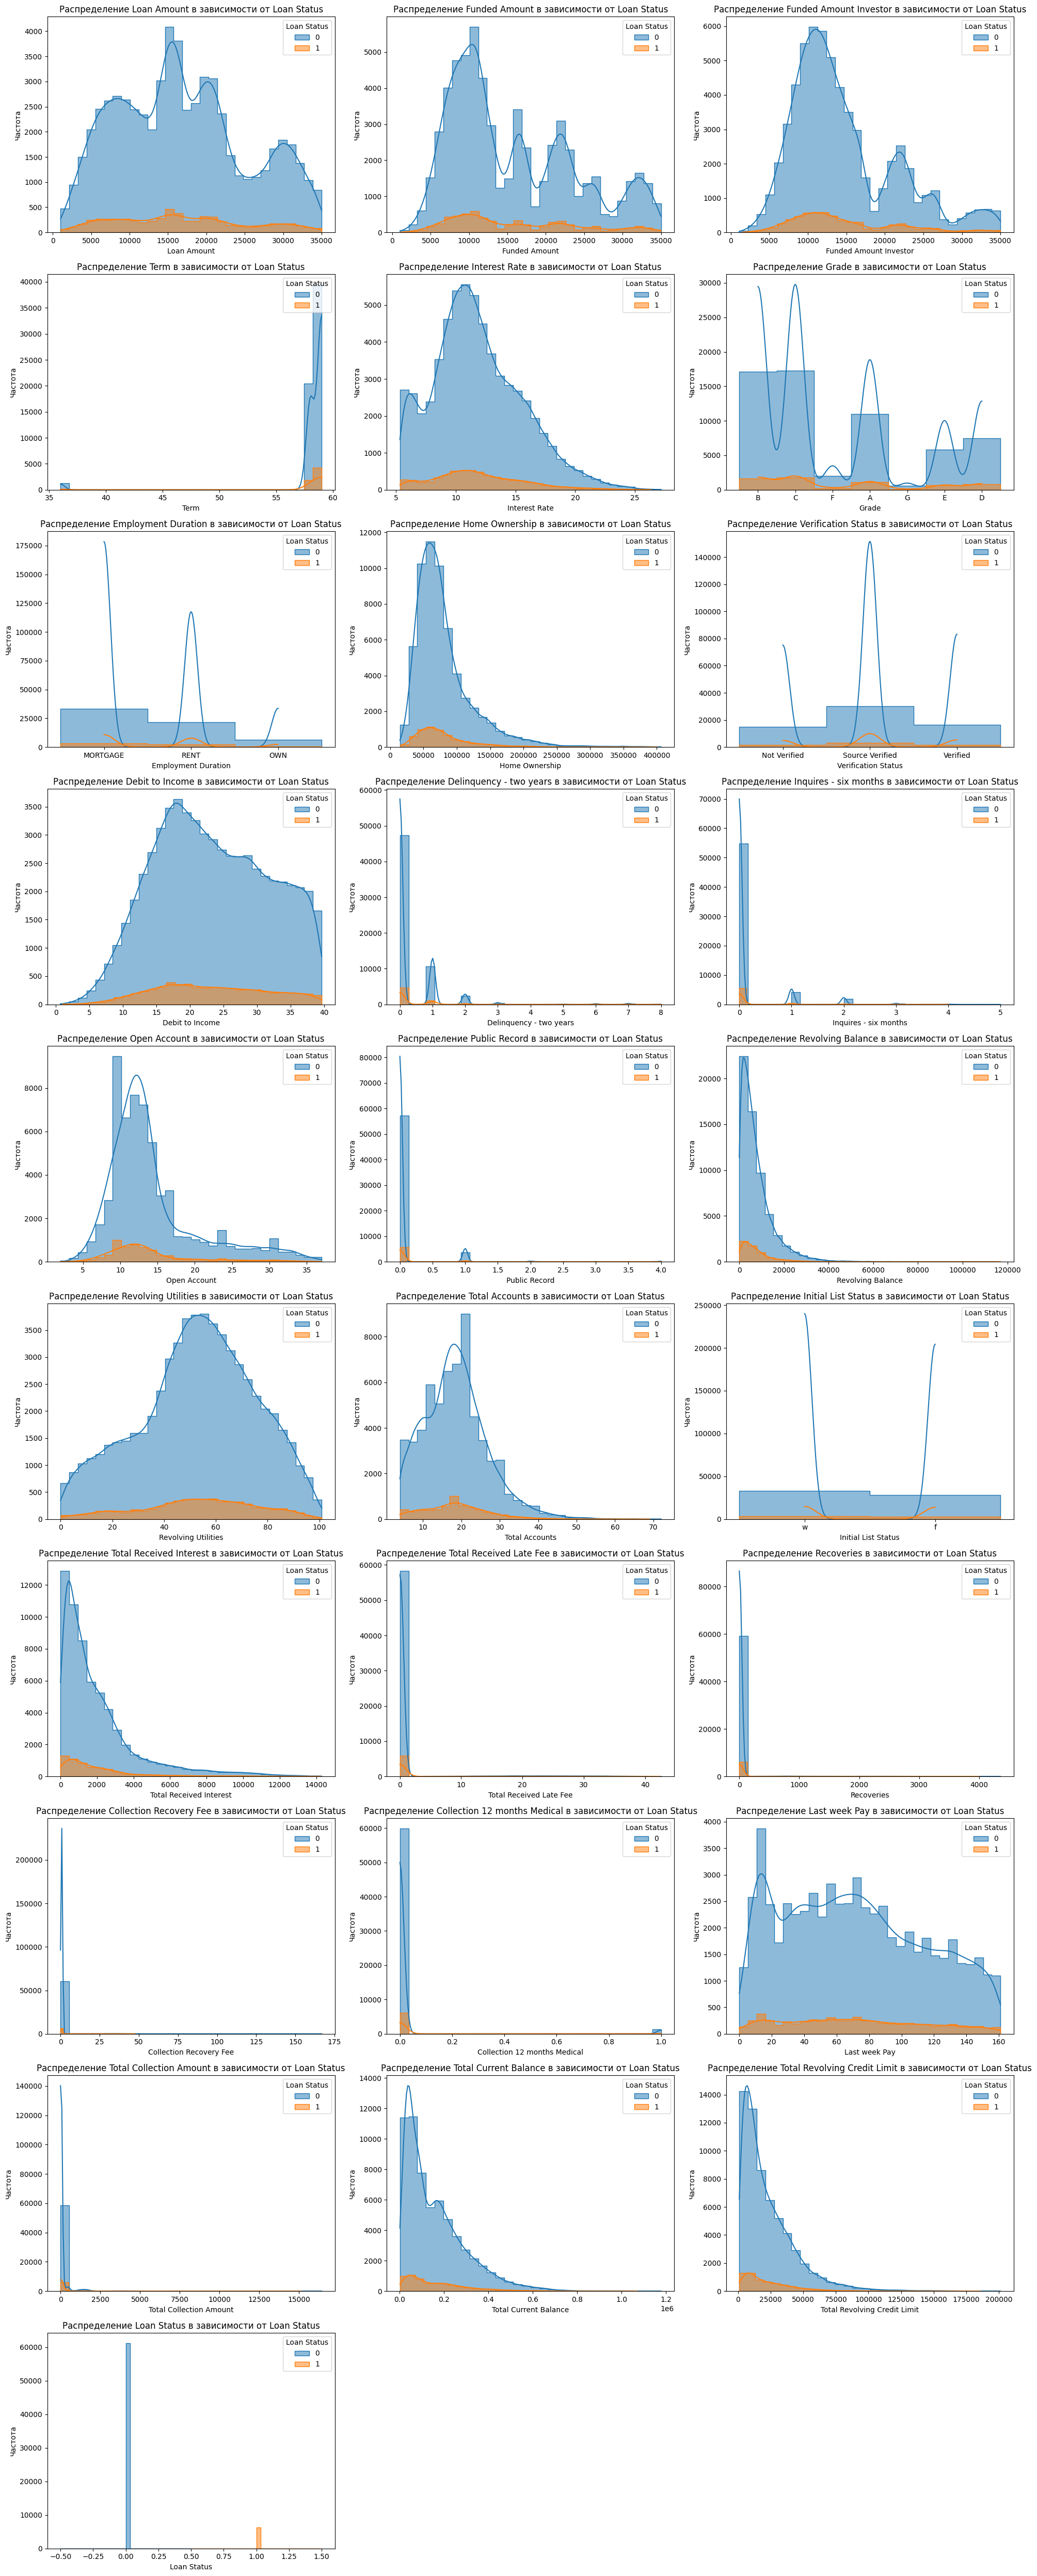

In [15]:
# Уникальные значения Loan Status
loan_statuses = df['Loan Status'].unique()

# Определите размер полотна и количество подграфиков
num_columns = len(df.columns)
num_rows = (num_columns + 2) // 3  # 3 графика в ряду

plt.figure(figsize=(20, num_rows * 5))

# Построение гистограмм для каждого столбца в зависимости от Loan Status
for i, column in enumerate(df.columns):
    plt.subplot(num_rows, 3, i + 1)
    for status in loan_statuses:
        subset = df[df['Loan Status'] == status]
        sns.histplot(subset[column], bins=30, kde=True, label=status, element='step')
    plt.title(f'Распределение {column} в зависимости от Loan Status')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.legend(title='Loan Status')

plt.tight_layout()
plt.show()

Гистограмма в зависимости от дефолтного/не дефолтного клиента не дала однозначного ответа. В не зависимости от класса распределения были похожи.

**Таким образом:** первичный анализ данных дал понять, что на дефолт может оказывать уровень рейтинга от банка (Grade), а также отсутсвие ипотеки

## **Машинное моделирование**

Для прогнозирование дефолта используем модели классификации:

*   Logistic Regression
*   Random Forest
*   KNeighbors Classifier
*   Support Vector Machine

Однако сперва категориальные признаки переведем в количественные с помощью метода: get_dummies

In [16]:
df_new =pd.get_dummies(df,columns=['Term', 'Grade', 'Employment Duration', 'Verification Status',
       'Initial List Status'],drop_first=True, dtype=int)
df_new

,Loan Amount,Funded Amount,Funded Amount Investor,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,...,Grade_C,Grade_D,Grade_E,Grade_F,Grade_G,Employment Duration_OWN,Employment Duration_RENT,Verification Status_Source Verified,Verification Status_Verified,Initial List Status_w
0,10000,32236,12329.36286,11.135007,176346.62670,16.284758,1,0,13,0,...,0,0,0,0,0,0,0,0,0,1
1,3609,11940,12191.99692,12.237563,39833.92100,15.412409,0,0,12,0,...,1,0,0,0,0,0,1,1,0,0
2,28276,9311,21603.22455,12.545884,91506.69105,28.137619,0,0,14,0,...,0,0,0,1,0,0,0,1,0,1
3,11170,6954,17877.15585,16.731201,108286.57590,18.043730,1,0,7,0,...,1,0,0,0,0,0,0,1,0,1
4,16890,13226,13539.92667,15.008300,44234.82545,17.209886,1,3,13,1,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,13601,6848,13175.28583,9.408858,83961.15003,28.105127,1,0,13,0,...,1,0,0,0,0,0,0,0,1,1
67459,8323,11046,15637.46301,9.972104,65491.12817,17.694279,0,0,12,0,...,1,0,0,0,0,0,1,1,0,1
67460,15897,32921,12329.45775,19.650943,34813.96985,10.295774,0,0,7,1,...,0,0,0,0,0,0,0,0,1,1
67461,16567,4975,21353.68465,13.169095,96938.83564,7.614624,0,0,14,0,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Loan Amount                          67463 non-null  int64  
 1   Funded Amount                        67463 non-null  int64  
 2   Funded Amount Investor               67463 non-null  float64
 3   Interest Rate                        67463 non-null  float64
 4   Home Ownership                       67463 non-null  float64
 5   Debit to Income                      67463 non-null  float64
 6   Delinquency - two years              67463 non-null  int64  
 7   Inquires - six months                67463 non-null  int64  
 8   Open Account                         67463 non-null  int64  
 9   Public Record                        67463 non-null  int64  
 10  Revolving Balance                    67463 non-null  int64  
 11  Revolving Utilities         

In [17]:
X= df_new.drop('Loan Status', axis=1)
y=df_new['Loan Status']

Прежде чем обучать необходимо нормализовать входящие данные

In [18]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

### 1. Logistic Regression

In [19]:
# Обучение модели логистической регрессии
model = LogisticRegression()
model.fit(x_scaled, y)

# Прогнозирование на тестовом наборе
y_pred = model.predict(x_scaled)

# Оценка точности модели
accuracy = accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Вычисление precision и recall
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

# Вывод отчета о классификации
print(classification_report(y, y_pred))

Accuracy: 0.91
Precision: 0.00
Recall: 0.00
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     61222
           1       0.00      0.00      0.00      6241

    accuracy                           0.91     67463
   macro avg       0.45      0.50      0.48     67463
weighted avg       0.82      0.91      0.86     67463



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Unde

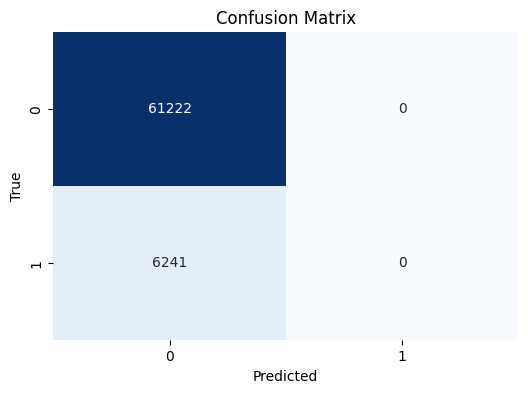

In [20]:
# Вычисление матрицы ошибок
cm = confusion_matrix(y, y_pred)

# Визуализация матрицы ошибок с помощью seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)

# Настройка графика
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Показ графика
plt.show()

LogisticRegression не смогла увидеть дефолтных заемщиков, следовательно данная модель плоха. Исследуем другие методы

### 2. Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Обучение модели
rf_model = RandomForestClassifier()
rf_model.fit(x_scaled, y)

# Прогнозирование на тестовом наборе
rf_y_pred = rf_model.predict(x_scaled)

# Оценка точности модели
accuracy = accuracy_score(y, rf_y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Вычисление precision и recall
precision = precision_score(y, rf_y_pred)
recall = recall_score(y, rf_y_pred)
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

# Вывод отчета о классификации
print(classification_report(y, rf_y_pred))

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61222
           1       1.00      1.00      1.00      6241

    accuracy                           1.00     67463
   macro avg       1.00      1.00      1.00     67463
weighted avg       1.00      1.00      1.00     67463



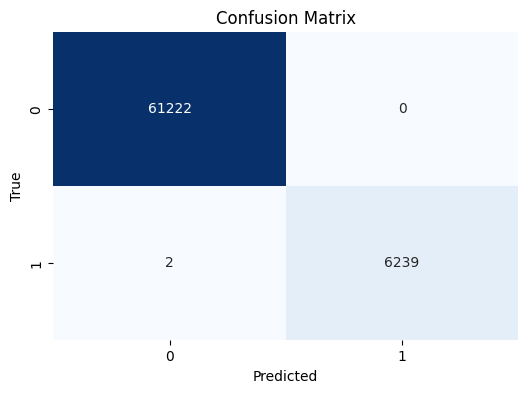

In [24]:
# Вычисление матрицы ошибок
cm = confusion_matrix(y, rf_y_pred)

# Визуализация матрицы ошибок с помощью seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)

# Настройка графика
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Показ графика
plt.show()

RandomForestClassifier смог предсказать дефолт, однако рассмотрим еще методы

### 3. KNeighbors Classifier

In [25]:
# Importing KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(x_scaled, y)

# Прогнозирование на тестовом наборе
knn_y_pred = knn_model.predict(x_scaled)

# Оценка точности модели
accuracy = accuracy_score(y, knn_y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Вычисление precision и recall
precision = precision_score(y, knn_y_pred)
recall = recall_score(y, knn_y_pred)
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

# Вывод отчета о классификации
print(classification_report(y, knn_y_pred))

Accuracy: 0.92
Precision: 1.00
Recall: 0.10
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     61222
           1       1.00      0.10      0.18      6241

    accuracy                           0.92     67463
   macro avg       0.96      0.55      0.57     67463
weighted avg       0.92      0.92      0.88     67463



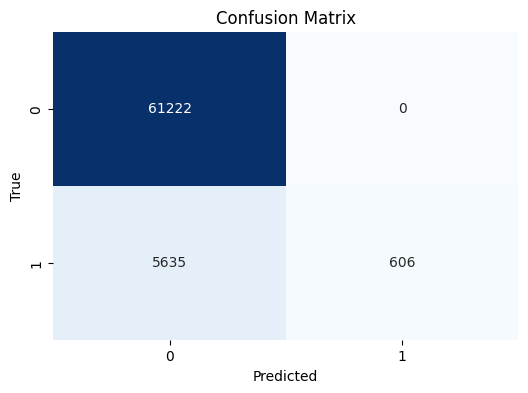

In [26]:
# Вычисление матрицы ошибок
cm = confusion_matrix(y, knn_y_pred)

# Визуализация матрицы ошибок с помощью seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)

# Настройка графика
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Показ графика
plt.show()

Лучше, чем логистическая регрессия, но хуже, чем случайный лес

### 4. Support Vector Machine

In [27]:
# Importing SVM
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(x_scaled, y)

# Прогнозирование на тестовом наборе
scv_y_model = svm_model.predict(x_scaled)

# Оценка точности модели
accuracy = accuracy_score(y, scv_y_model)
print(f'Accuracy: {accuracy:.2f}')

# Вычисление precision и recall
precision = precision_score(y, scv_y_model)
recall = recall_score(y, scv_y_model)
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

# Вывод отчета о классификации
print(classification_report(y, scv_y_model))

Accuracy: 0.91
Precision: 0.00
Recall: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.91      1.00      0.95     61222
           1       0.00      0.00      0.00      6241

    accuracy                           0.91     67463
   macro avg       0.45      0.50      0.48     67463
weighted avg       0.82      0.91      0.86     67463



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


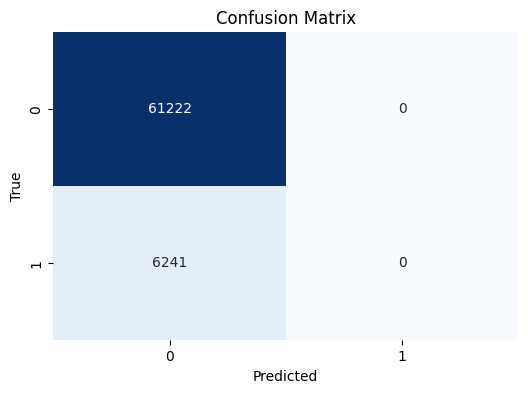

In [29]:
# Вычисление матрицы ошибок
cm = confusion_matrix(y, scv_y_model)

# Визуализация матрицы ошибок с помощью seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)

# Настройка графика
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Показ графика
plt.show()

Модель не подходит под задачи

## **Тестирование итоговой модели**

In [44]:
df_test = pd.read_csv("test.csv")
df_test.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,56492997,17120,10365,16025.082690,59,BAT2575549,12.163926,A,D1,RENT,...,8.425776,0.731797,0,INDIVIDUAL,135,0,24,475442,4364,NaN
1,22540813,7133,11650,12615.795600,59,BAT2833642,6.564296,B,E3,MORTGAGE,...,6.157008,0.992918,0,INDIVIDUAL,56,0,1,72412,2573,NaN
2,9862181,25291,25825,11621.280830,59,BAT1761981,14.729900,A,C3,MORTGAGE,...,5.705077,0.281580,0,INDIVIDUAL,3,0,26,284825,19676,NaN
3,10097822,30781,9664,15375.823510,59,BAT5341619,10.523767,A,A2,RENT,...,2.469688,0.959162,0,INDIVIDUAL,21,0,32,40842,7226,NaN
4,47771809,8878,9419,7176.647582,58,BAT4694572,9.997013,C,B3,OWN,...,2.127835,0.402315,0,INDIVIDUAL,104,0,33,90825,26145,NaN


В тестовых данных появились новые данные для Term, однако модель их ранее не видела, поэтому исключим их, чтобы можно было прогнозировать

In [45]:
df_test_ = df_test[df_test['Term'] != 60]

In [46]:
df_test_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25080 entries, 0 to 28905
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            25080 non-null  int64  
 1   Loan Amount                   25080 non-null  int64  
 2   Funded Amount                 25080 non-null  int64  
 3   Funded Amount Investor        25080 non-null  float64
 4   Term                          25080 non-null  int64  
 5   Batch Enrolled                25080 non-null  object 
 6   Interest Rate                 25080 non-null  float64
 7   Grade                         25080 non-null  object 
 8   Sub Grade                     25080 non-null  object 
 9   Employment Duration           25080 non-null  object 
 10  Home Ownership                25080 non-null  float64
 11  Verification Status           25080 non-null  object 
 12  Payment Plan                  25080 non-null  object 
 13  Loan T

In [47]:
df_test_.drop(['ID','Batch Enrolled','Sub Grade','Payment Plan','Loan Title','Application Type','Accounts Delinquent'],axis=1,inplace=True)
df_test_new =pd.get_dummies(df_test_,columns=['Term', 'Grade', 'Employment Duration', 'Verification Status',
       'Initial List Status'],drop_first=True, dtype=int)

X_test = df_test_new.drop('Loan Status', axis=1)

x_scaled_test = scaler.fit_transform(X_test)

<ipython-input-47-dd1279b6d681>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_.drop(['ID','Batch Enrolled','Sub Grade','Payment Plan','Loan Title','Application Type','Accounts Delinquent'],axis=1,inplace=True)


In [50]:
# Прогнозирование на тестовом наборе
rf_y_pred_test = rf_model.predict(x_scaled_test)

df_test_['Loan Status Predicted'] = rf_y_pred_test

<ipython-input-50-1653e5194b41>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_['Loan Status Predicted'] = rf_y_pred_test


In [52]:
df_test_['Loan Status Predicted'].unique()

array([0])

Созданная модель предсказала, что нет дефолтных в тестовой выборке

_________________________________________________________________________

Данные взяты с kaggle:
https://www.kaggle.com/datasets/hemanthsai7/loandefault/code